# California Housing 

# Libraries 

In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt 
import plotly.express as px 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

# set style 

plt.style.use('seaborn-darkgrid')

mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

class clr:
    S = '\033[1m' + '\033[95m'
    E = '\033[0m'


# Color palette

my_colors = ["#ce8f5a", "#efd199", "#80c8bc", "#5ec0ca", "#6287a2"]

In [91]:
df = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

In [92]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [94]:
df.isna().sum().sort_values

<bound method Series.sort_values of longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64>

In [95]:
df.dropna(inplace = True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [97]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [98]:
x = df.drop(['median_house_value'] , axis = 1)
y = df['median_house_value']

In [99]:
x_train , x_test , y_train , y_test = tts(x , y , test_size = 0.2)

In [100]:
df.ocean_proximity.value_counts() 

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [101]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [102]:
train_data = x_train.join(y_train)

In [103]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
6092,-117.85,34.11,27.0,1748.0,403.0,985.0,416.0,3.1133,INLAND,180600.0
9301,-122.56,38.01,21.0,2144.0,400.0,840.0,398.0,4.6000,NEAR BAY,239500.0
6730,-118.14,34.11,52.0,2742.0,422.0,1153.0,414.0,8.1124,<1H OCEAN,500001.0
12732,-121.36,38.58,25.0,3196.0,406.0,978.0,419.0,8.4699,INLAND,344000.0
14318,-117.14,32.70,44.0,658.0,218.0,869.0,212.0,1.9338,NEAR OCEAN,89400.0
...,...,...,...,...,...,...,...,...,...,...
8793,-118.39,33.79,30.0,4402.0,563.0,1582.0,551.0,10.8980,NEAR OCEAN,500001.0
2763,-115.88,32.93,15.0,208.0,49.0,51.0,20.0,4.0208,INLAND,32500.0
2536,-121.94,39.45,39.0,844.0,161.0,535.0,165.0,1.8320,INLAND,70500.0
8023,-118.12,33.84,37.0,2706.0,462.0,1331.0,476.0,5.0719,<1H OCEAN,220000.0


In [104]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7190
INLAND        5219
NEAR OCEAN    2098
NEAR BAY      1836
ISLAND           3
Name: ocean_proximity, dtype: int64

In [105]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'] , axis = 1)

<AxesSubplot:>

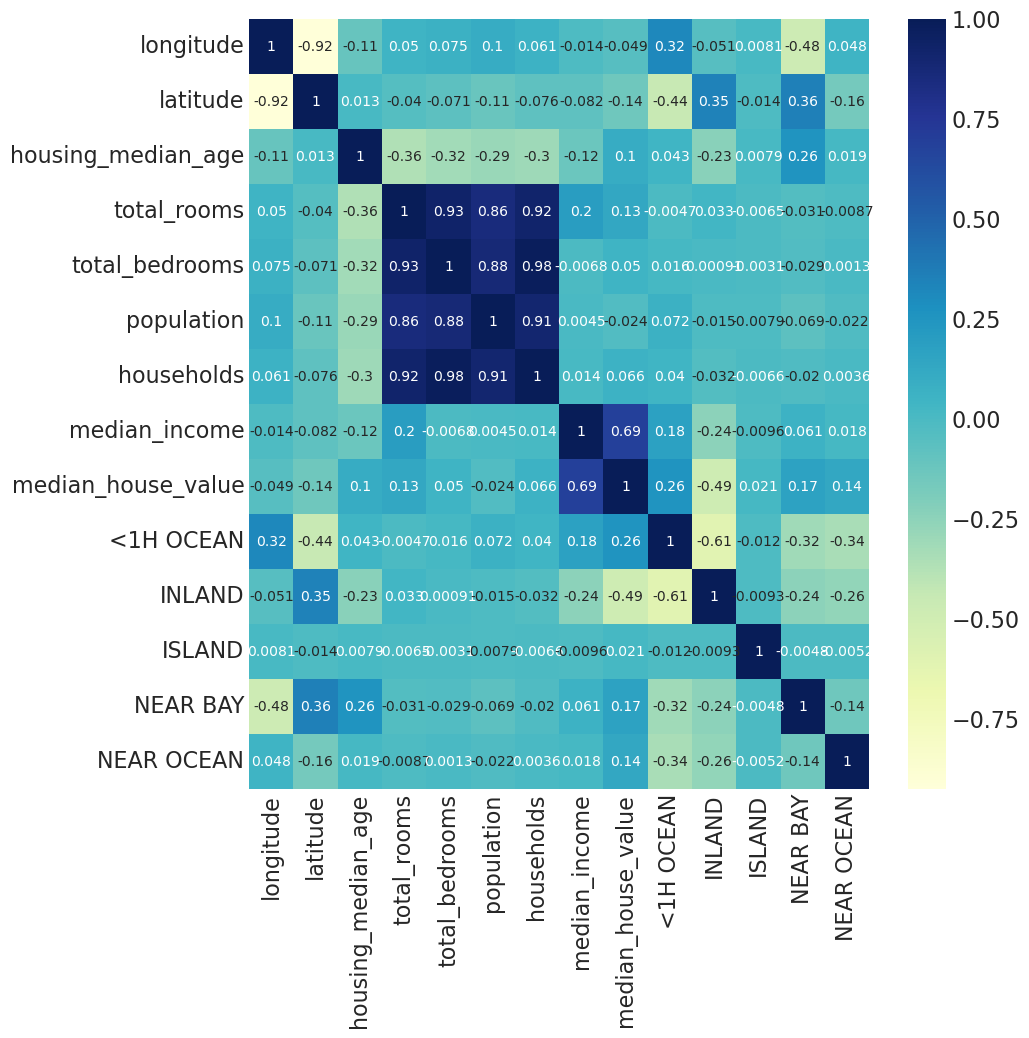

In [106]:
plt.figure(figsize = (10 , 10))
sns.heatmap(train_data.corr() , annot = True ,cmap = 'YlGnBu' )

In [111]:
reg = LinearRegression()
y_train


6092     180600.0
9301     239500.0
6730     500001.0
12732    344000.0
14318     89400.0
           ...   
8793     500001.0
2763      32500.0
2536      70500.0
8023     220000.0
7702     266000.0
Name: median_house_value, Length: 16346, dtype: float64

In [116]:
x_train , y_train =train_data.drop(['median_house_value'] , axis = 1) ,  train_data['median_house_value']
reg.fit(x_train , y_train)


LinearRegression()

In [123]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2178,-119.87,36.76,34.0,1649.0,323.0,919.0,316.0,2.8750,0,1,0,0,0
545,-122.27,37.77,52.0,2252.0,388.0,1033.0,434.0,5.5337,0,0,0,1,0
13916,-116.15,34.14,18.0,3312.0,705.0,1251.0,512.0,3.0139,0,1,0,0,0
12177,-117.32,33.80,11.0,3196.0,576.0,1757.0,552.0,4.0982,0,1,0,0,0
787,-122.09,37.63,34.0,1457.0,242.0,735.0,249.0,3.9167,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19388,-120.87,37.76,16.0,2022.0,413.0,1126.0,408.0,2.5655,0,1,0,0,0
250,-122.22,37.78,51.0,1637.0,463.0,1543.0,393.0,2.4890,0,0,0,1,0
11621,-118.04,33.83,19.0,4526.0,830.0,2318.0,748.0,4.6681,1,0,0,0,0
20149,-119.12,34.38,28.0,7200.0,1281.0,3793.0,1238.0,4.0750,1,0,0,0,0


In [122]:
### for test data
x_test
test_data = x_test.join(y_test)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'] , axis = 1)
x_test , y_test =test_data.drop(['median_house_value'] , axis = 1) ,  test_data['median_house_value']


0.6449605470110694

In [124]:
reg.score(x_test , y_test)

0.6449605470110694